In [36]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete= pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [37]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)
# Preview DataFrame
tumor_vols_mean.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [38]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
# Preview DataFrame
tumor_vols_sem.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [39]:
tumor_vols_pivot_mean=tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vols_pivot_mean

KeyError: "None of ['Timepoint', 'Drug'] are in the columns"

In [40]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_vols_pivot_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


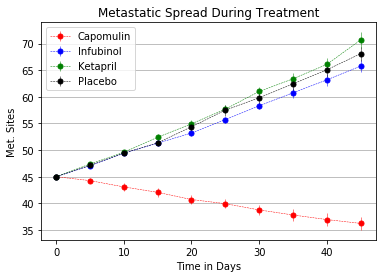

In [41]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

# Save the Figure
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Time in Days")

plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"],loc="best")
plt.savefig("Analysis/figure1.png")
plt.show()

In [42]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [43]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
metastatic_response_mean = pd.DataFrame(metastatic_response_mean)
# Preview DataFrame
metastatic_response_mean.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [44]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
metastatic_response_sem = pd.DataFrame(metastatic_response_sem)
# Preview DataFrame
metastatic_response_sem.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [45]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_mean=metastatic_response_mean.reset_index()
metastatic_pivot_mean=metastatic_response_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metastatic_response_sem=metastatic_response_sem.reset_index()
metastatic_pivot_sem=metastatic_response_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metastatic_pivot_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


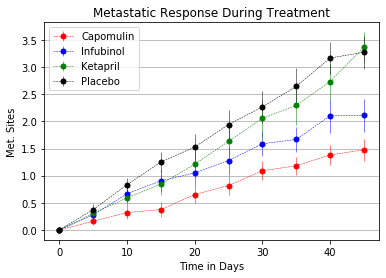

In [46]:
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Capomulin"], yerr=metastatic_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Infubinol"], yerr=metastatic_pivot_sem["Infubinol"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Ketapril"], yerr=metastatic_pivot_sem["Ketapril"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(metastatic_pivot_mean.index, metastatic_pivot_mean["Placebo"], yerr=metastatic_pivot_sem["Placebo"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

# Save the Figure
plt.title("Metastatic Response During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Time in Days")

plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"],loc="best")
plt.savefig("Analysis/figure2.png")
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
survival_count = pd. DataFrame({"Mouse Count": survival_count})
# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [48]:
survival_count.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [49]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


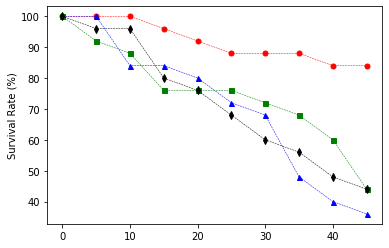

In [50]:
# Generate the Plot (Accounting for percentages)
numMice = 25

plt.plot(survival_count_pivot["Capomulin"]/numMice*100, "ro", linestyle="dashed", markersize=5, linewidth=0.50, label="Capomulin")
plt.plot(survival_count_pivot["Infubinol"]/numMice*100, "b^", linestyle="dashed", markersize=5, linewidth=0.50, label="Infubinol")
plt.plot(survival_count_pivot["Ketapril"]/numMice*100, "gs", linestyle="dashed", markersize=5, linewidth=0.50, label="Ketapril")
plt.plot(survival_count_pivot["Placebo"]/numMice*100, "kd", linestyle="dashed", markersize=5, linewidth=0.50, label="Placebo")


plt.ylabel("Survival Rate (%)")
plt.xlabel("")

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [51]:
# Calculate the percent changes for each drug
tumor_pct_change = 100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0] / tumor_vols_pivot_mean.iloc[0])
tumor_pct_change_sem = 100 * (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_pivot_sem.iloc[0] / tumor_vols_pivot_sem.iloc[0])
# Display the data to confirm
tumor_pct_change

Drug
Capomulin    3523.611380
Ceftamin     6313.242134
Infubinol    6475.556228
Ketapril     6966.295761
Naftisol     6826.550621
Placebo      6708.408222
Propriva     6525.852869
Ramicane     3395.559479
Stelasyn     6743.831043
Zoniferol    6496.088789
dtype: float64

In [52]:
tumor_pct_change_sem

Drug
Capomulin   NaN
Ceftamin    NaN
Infubinol   NaN
Ketapril    NaN
Naftisol    NaN
Placebo     NaN
Propriva    NaN
Ramicane    NaN
Stelasyn    NaN
Zoniferol   NaN
dtype: float64

In [53]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Placebo"])

pct_changes

# Splice the data between passing and failing drugs
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFall = ax.bar(ind[1:], pct_changes[1:], width, color='red')
# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,3,
               '%d%%' % int(height),
               ha='center', va='bottom', color="white")
        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%%' % int(height),
               ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/Fig4.png")

# Show the Figure
fig.show()

NameError: name 'ax' is not defined

![Metastatic Spread During Treatment](../Images/change.png)